In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

dataset1 = pd.read_csv("heart.csv")

Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset1[~((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Train Test split
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

# K-Fold Cross-Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Model Fitting
models = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    svm.SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=7),
    DecisionTreeClassifier(random_state=12),
    RandomForestClassifier(random_state=12)
]

# Specify scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(recall_score, pos_label=0)
}

# Lists to store results
classifier_algorithms = []
mean_precision_scores = []
mean_recall_scores = []
mean_f1_scores = []
mean_accuracy_scores = []
mean_sensitivity_scores = []
mean_specificity_scores = []


##            LogisticRegression           

Mean Precision: 0.83
Mean Recall: 0.89
Mean F1 Score: 0.86
Mean Accuracy: 0.83
Mean Sensitivity: 0.89
Mean Specificity: 0.76


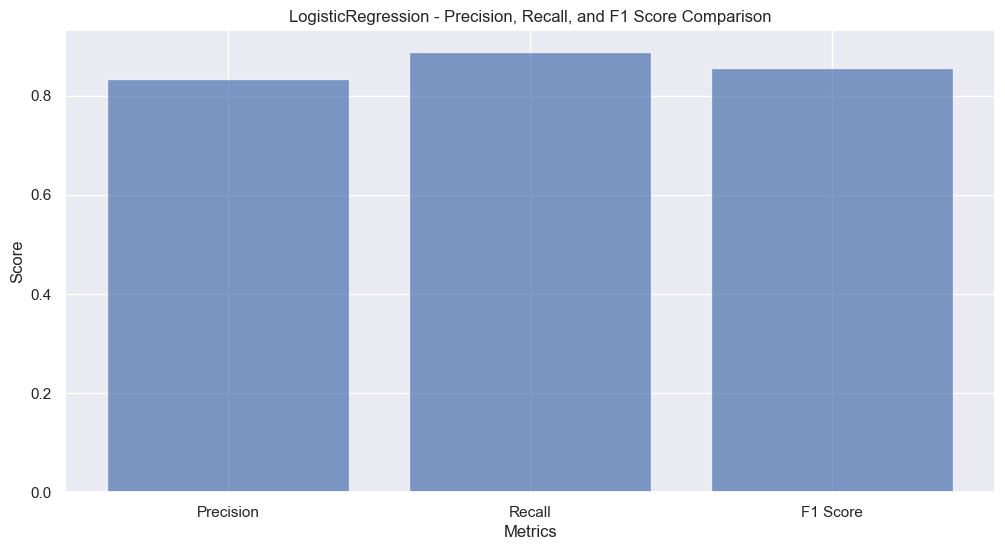

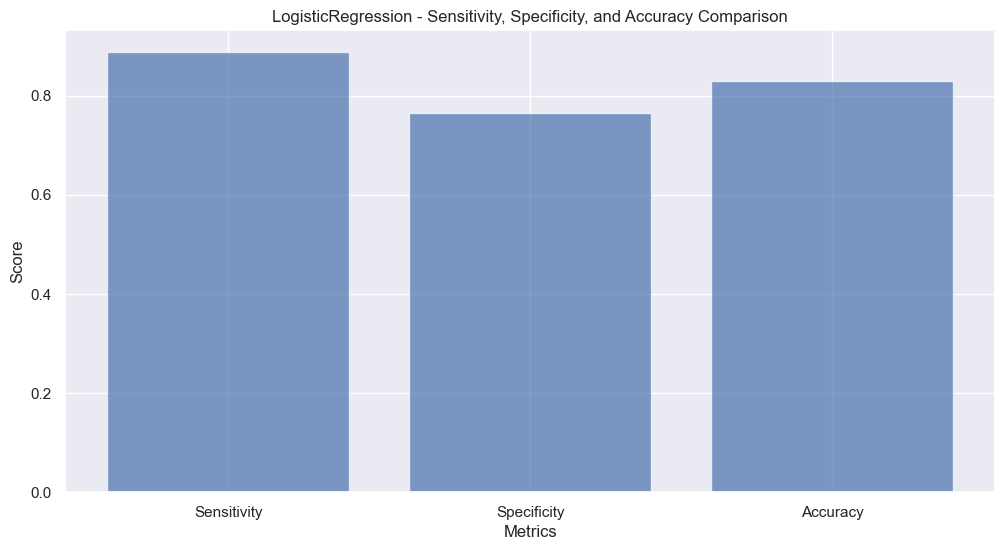

##            GaussianNB           

Mean Precision: 0.85
Mean Recall: 0.85
Mean F1 Score: 0.84
Mean Accuracy: 0.82
Mean Sensitivity: 0.85
Mean Specificity: 0.79


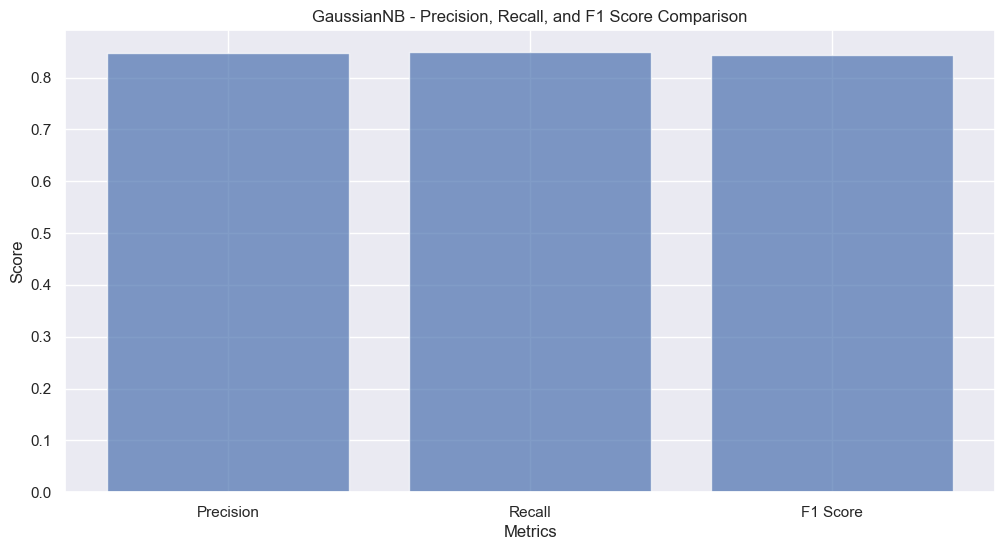

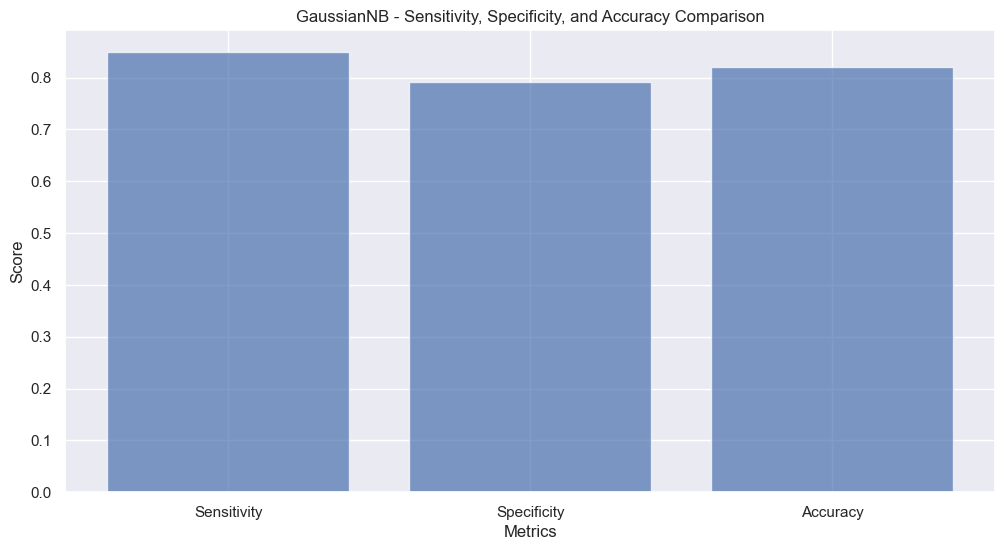

##            SVC           

Mean Precision: 0.86
Mean Recall: 0.89
Mean F1 Score: 0.87
Mean Accuracy: 0.85
Mean Sensitivity: 0.89
Mean Specificity: 0.80


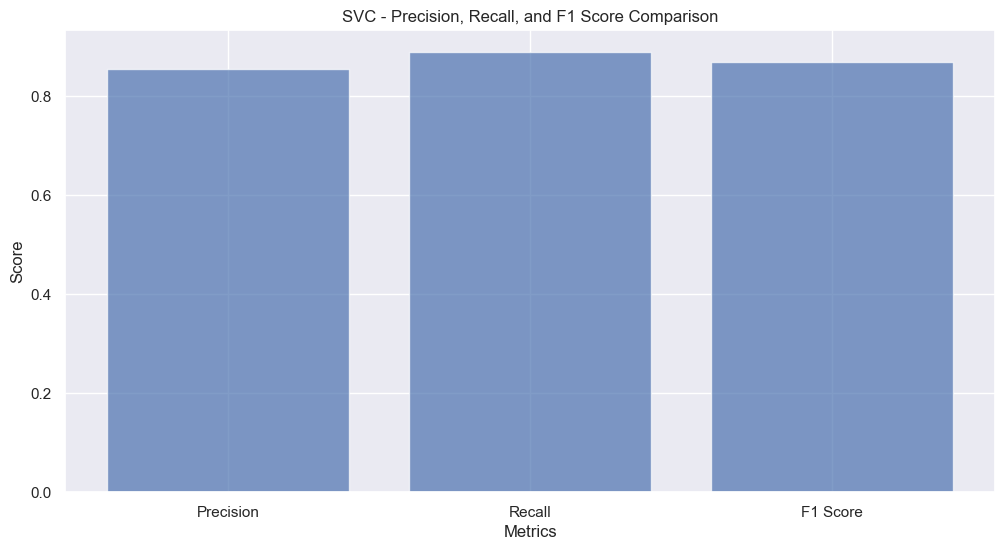

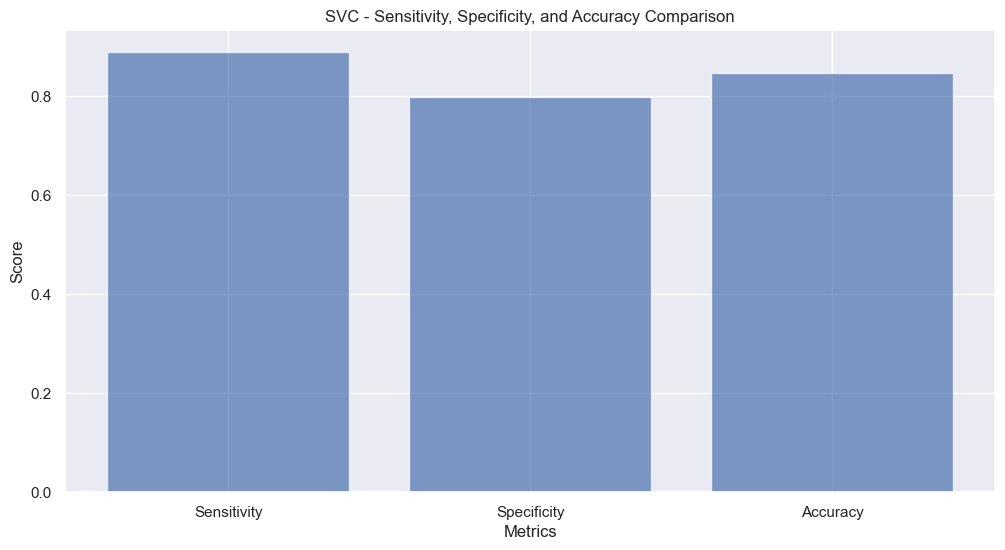

##            KNeighborsClassifier           

Mean Precision: 0.66
Mean Recall: 0.75
Mean F1 Score: 0.69
Mean Accuracy: 0.62
Mean Sensitivity: 0.75
Mean Specificity: 0.47


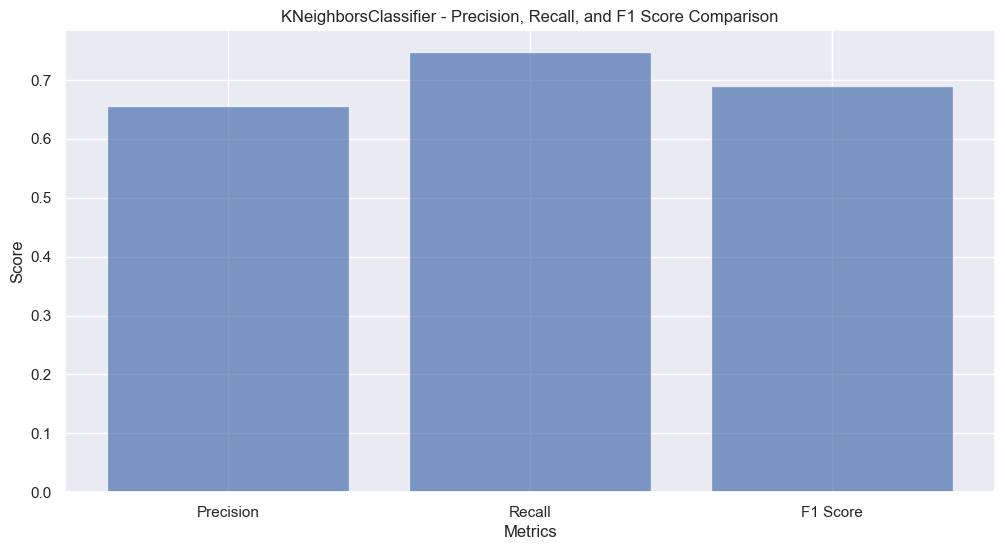

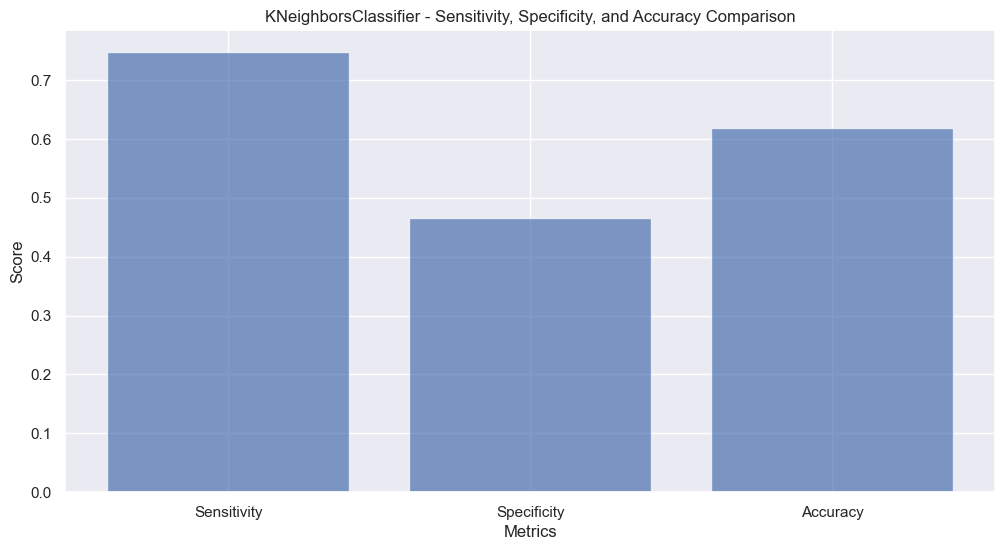

##            DecisionTreeClassifier           

Mean Precision: 0.80
Mean Recall: 0.78
Mean F1 Score: 0.79
Mean Accuracy: 0.76
Mean Sensitivity: 0.78
Mean Specificity: 0.74


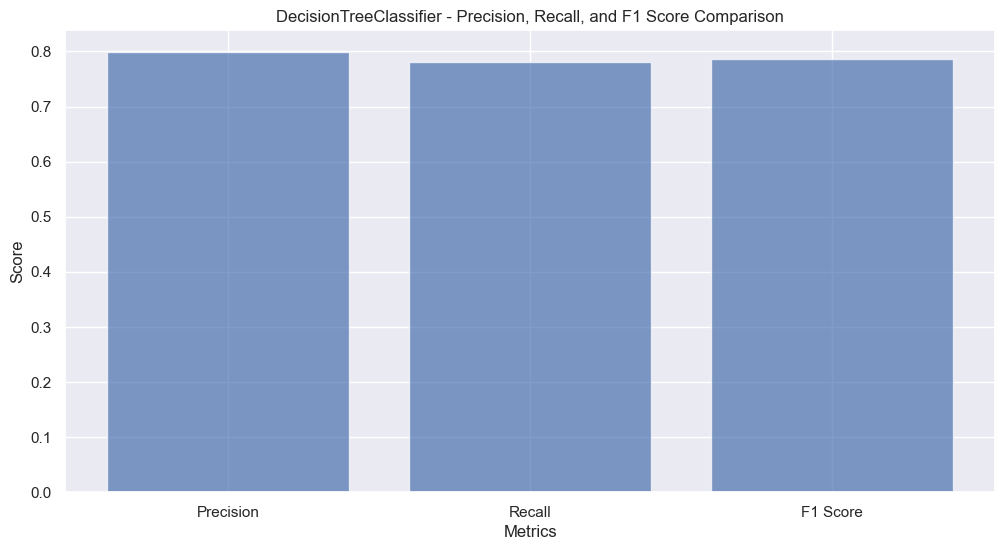

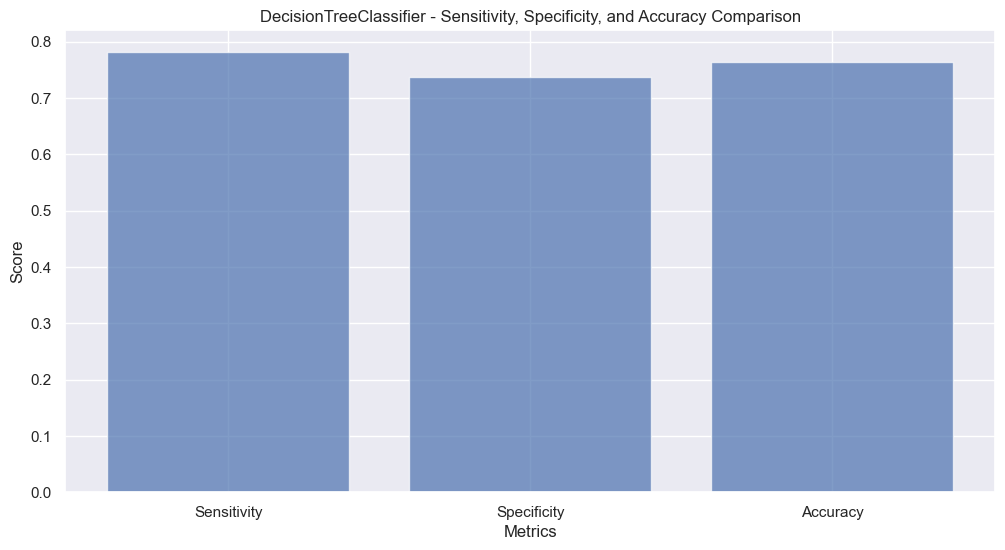

##            RandomForestClassifier           

Mean Precision: 0.85
Mean Recall: 0.87
Mean F1 Score: 0.86
Mean Accuracy: 0.83
Mean Sensitivity: 0.87
Mean Specificity: 0.79


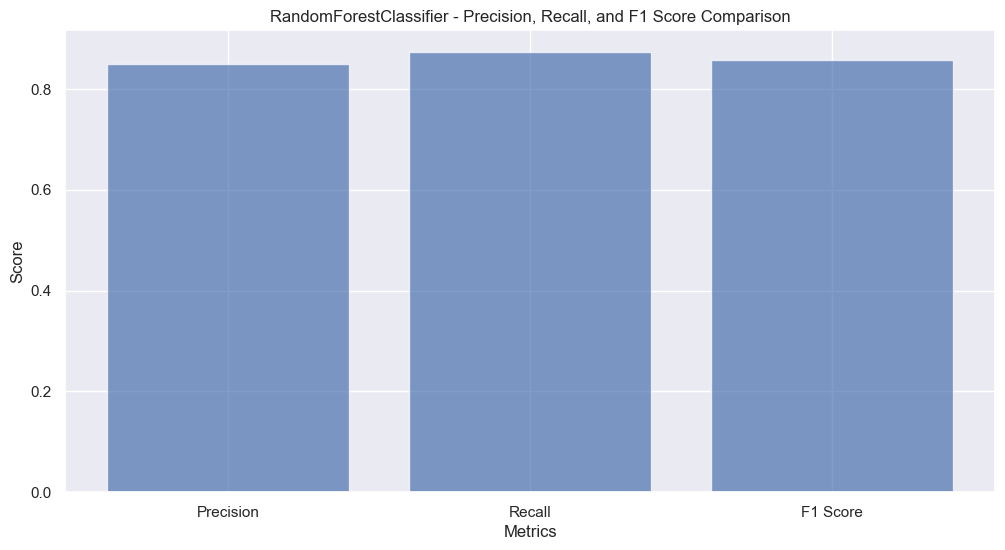

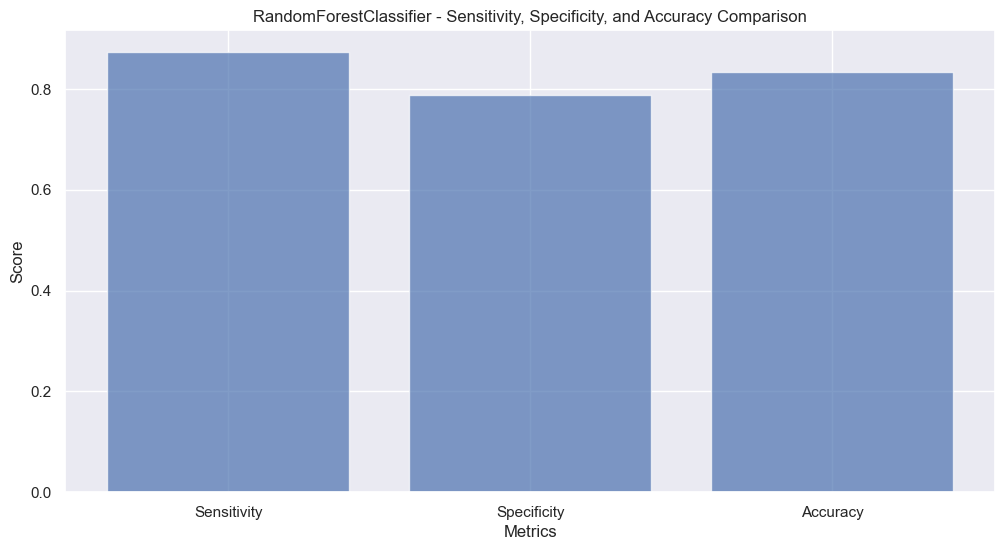

In [2]:

# Displaying results for each model
for model in models:
    model_name = model.__class__.__name__
    
    # heading
    display(Markdown(f"## {' '*10} {model_name} {' '*10}"))
    cv_results = cross_validate(model, predictors, target, cv=kf, scoring=scoring)

    # Store mean scores in the lists
    classifier_algorithms.append(model_name)
    mean_precision_scores.append(np.mean(cv_results['test_precision']))
    mean_recall_scores.append(np.mean(cv_results['test_recall']))
    mean_f1_scores.append(np.mean(cv_results['test_f1']))
    mean_accuracy_scores.append(np.mean(cv_results['test_accuracy']))
    mean_sensitivity_scores.append(np.mean(cv_results['test_sensitivity']))
    mean_specificity_scores.append(np.mean(cv_results['test_specificity']))

    # Printing mean metrics
    print("Mean Precision: {:.2f}".format(mean_precision_scores[-1]))
    print("Mean Recall: {:.2f}".format(mean_recall_scores[-1]))
    print("Mean F1 Score: {:.2f}".format(mean_f1_scores[-1]))
    print("Mean Accuracy: {:.2f}".format(mean_accuracy_scores[-1]))
    print("Mean Sensitivity: {:.2f}".format(mean_sensitivity_scores[-1]))
    print("Mean Specificity: {:.2f}".format(mean_specificity_scores[-1]))

    sns.set(rc={'figure.figsize': (12, 6)})

    plt.figure()
    plt.bar(["Precision", "Recall", "F1 Score"], [mean_precision_scores[-1], mean_recall_scores[-1], mean_f1_scores[-1]], alpha=0.7)
    plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()

    # Plot 2: Sensitivity, Specificity, and Accuracy
    plt.figure()
    plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [mean_sensitivity_scores[-1], mean_specificity_scores[-1], mean_accuracy_scores[-1]], alpha=0.7)
    plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()




In [3]:
table1 = pd.DataFrame({
    'Classifier Algorithm': classifier_algorithms,
    'Sensitivity': mean_sensitivity_scores,
    'Specificity': mean_specificity_scores,
    'Accuracy': mean_accuracy_scores,
}).round(3)

table2 = pd.DataFrame({
    'Classifier Algorithm': classifier_algorithms,
    'Precision': mean_precision_scores,
    'Recall': mean_recall_scores,
    'F1 Score': mean_f1_scores
}).round(3)

# Print tables
print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table1, headers='keys', tablefmt='pretty', showindex=False))

print("\nResults for Precision, Recall, and F1 Score:")
print(tabulate(table2, headers='keys', tablefmt='pretty', showindex=False))


Results for Sensitivity, Specificity, and Accuracy:
+------------------------+-------------+-------------+----------+
|  Classifier Algorithm  | Sensitivity | Specificity | Accuracy |
+------------------------+-------------+-------------+----------+
|   LogisticRegression   |    0.888    |    0.764    |  0.829   |
|       GaussianNB       |    0.849    |    0.792    |   0.82   |
|          SVC           |    0.889    |    0.799    |  0.847   |
|  KNeighborsClassifier  |    0.747    |    0.465    |  0.618   |
| DecisionTreeClassifier |    0.781    |    0.737    |  0.763   |
| RandomForestClassifier |    0.873    |    0.789    |  0.833   |
+------------------------+-------------+-------------+----------+

Results for Precision, Recall, and F1 Score:
+------------------------+-----------+--------+----------+
|  Classifier Algorithm  | Precision | Recall | F1 Score |
+------------------------+-----------+--------+----------+
|   LogisticRegression   |   0.834   | 0.888  |  0.856   |
|     

Accuracy of Each Alogorithm 

LogisticRegression --  0.83
GaussianNB --  0.82
SVC --  0.85
KNeighborsClassifier --  0.62
DecisionTreeClassifier --  0.76
RandomForestClassifier --  0.83


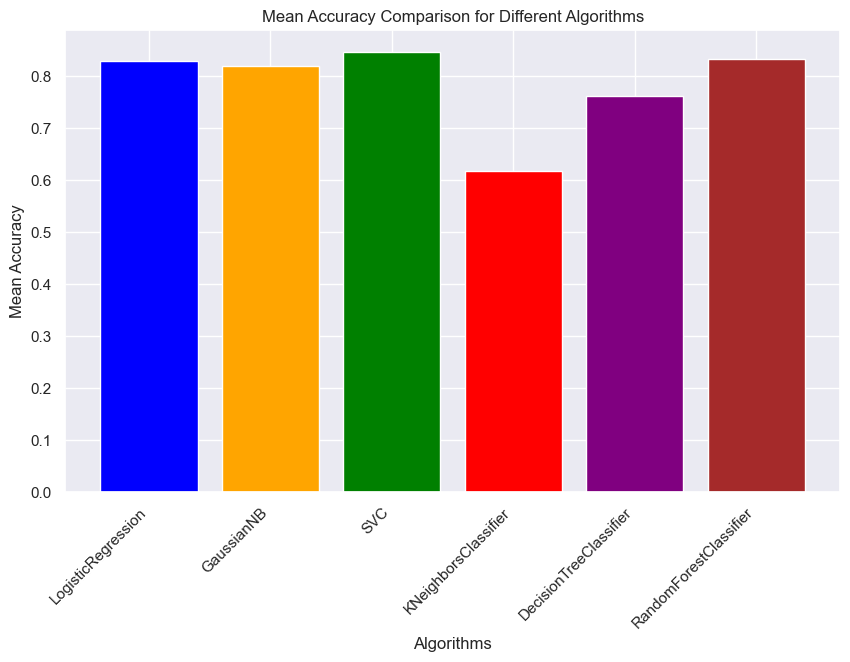

In [4]:
print("Accuracy of Each Alogorithm \n")
for algorithm, accuracy in zip(classifier_algorithms, mean_accuracy_scores):
    print(f"{algorithm} --  {accuracy:.2f}")


sns.set(rc={'figure.figsize': (10, 6)})
plt.bar(classifier_algorithms, mean_accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Accuracy Comparison for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Mean Accuracy')

plt.xticks(rotation=45, ha='right')
plt.show()